# 4. Introduction to Sympy for Mathematicians

## Table of Contents
- __Introduction to Sympy__
- __Plots__
- __Polynomials__
- Series
    - Taylor Series
    - Summing Series
- Linear Algebra
- Differential Equations
- __Limits, Derivatives, Integrals__
    - __Limits__
    - __Derivatives__
    - __Integrals__

Next week? Choose among:

- Stochastics/statistics: `random`, `scipy.statistics` , `statsmodels`
- Machine Learning 2/Deep Learning: `scikit-learn`, `keras`, `tensorflow`
- SAGE
- Other: ___________?



## 4.1 Introduction to SymPy

`sympy` is a package for symbolic calculations in Python, similar to *Wolfram Alpha/Mathematica*. It works with expressions containing symbols. Its core symbolic capabilities include:

- Elementary algebra
- Pattern matching and substitution
- Symbolic transformations and simplifications
- All the common mathematical functions and many special ones
- Calculus: limits, derivatives, integrals, Taylor series, and so on
- Solving many kinds of equations, including differential equations
- Linear algebra
- Polynomials
- Infinite sums and products
- Planar geometry
- Physical constants and units
- Numeric computation in arbitrary precision

Today we will import everything contained in the package:

In [10]:
# import sympy as sym
from sympy import *
init_printing()

SymPy is also available at http://live.sympy.org, an online Python shell, with `sympy` already imported, which
allows you to perform simple calculations. The full documentation of this package can be found here: https://docs.sympy.org/latest/index.html. We can also watch a YouTube video:

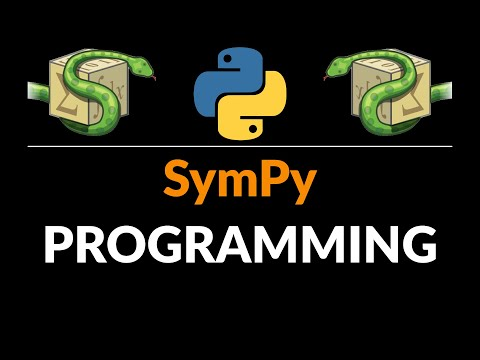

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('kx2GzBeGPco', width=533, height=300)

Symbols are basic bricks used to construct expressions.
Each symbol has a name used for printing expressions. Objects of the class `Symbol` should be created and assigned to Python variables in order to be used in expressions. The symbol name and the name of the variable to which this symbol is assigned are two independent things, and one may write `abc=Symbol('xyz')`. But then one has to write `abc` in input expressions, while `SymPy` will write `xyz` in output ones, producing unnecessary confusion. The Python variable name should better be the same as the symbol name.

In languages specifically designed for symbolic calculations, such as *Mathematica*, if a variable to which nothing has been assigned is used, it automatically means a symbol with the same name. Python has not been designed for symbolic calculations. If you use a variable to which nothing has been assigned, you will get an error message. Symbol objects have to be created explicitly.

In [12]:
x = Symbol('x')
x

In [9]:
a = x**2-1
a

However, we can also use the command `sympify`, then we don't need to define $x$ manually:

In [5]:
sympify('x^2 - 1')

x**2 - 1

Internally expressions are trees. The function `srepr` returns a string representing this tree.

In [13]:
srepr(a)

"Add(Pow(Symbol('x'), Integer(2)), Integer(-1))"

One may use the functions `Add`, `Mul`, `Pow`, etc. instead of the binary operations `+`, `*`, `**`, etc.

In [14]:
Add(Pow(Symbol('x'), Integer(2)), Integer(-1))

Some packages are available that provide Greek letters:

In [15]:
from sympy.abc import _clash2

f = sympify('beta^alpha * x^(alpha - 1) * e^(-beta * x)/ Gamma(alpha)', locals=_clash2)
f

In [16]:
srepr(f)

"Mul(Pow(Symbol('beta'), Symbol('alpha')), Pow(Symbol('e'), Mul(Integer(-1), Symbol('beta'), Symbol('x'))), Pow(Symbol('x'), Add(Symbol('alpha'), Integer(-1))), Pow(Function('Gamma')(Symbol('alpha')), Integer(-1)))"

Several symbols can be defined at once. The string is split at spaces.

In [17]:
y,z = symbols('y z')

Let's substitute $y+1$ for $x$.

In [18]:
b = a.subs(x,y+1)
b

`sympy` automatically applies simplifications of elementary functions which are correct everywhere.

In [19]:
cos(-x)

In [20]:
cos(pi/4)

The method `rewrite` tries to rewrite an expression in terms of a given function.

In [21]:
cos(x).rewrite(exp)

Be careful that some functions cannot always be simplified by default:

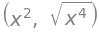

In [22]:
sqrt(x)**4, sqrt(x**4)

Why not $x^2$? Try $x=i$.

In [23]:
x = symbols('x',real=True)
sqrt(x**4)

## 4.2 Plots

Let's plot `a = x**2-1` and `b = a.subs(x,y+1)`. To do this, we first change the variable $y$ to $x$:

In [24]:
a = x**2-1
b = b.subs(y,x)
b

`sympy` uses `matplotlib`. However, it distributes $x$ points adaptively, not uniformly.

In [18]:
%matplotlib inline

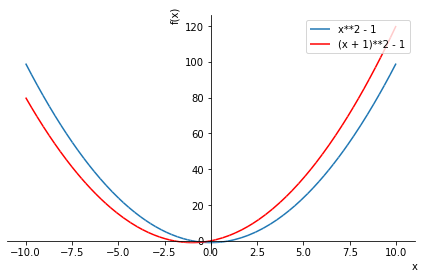

In [25]:
p = plot(a, b, show=False)
p[1].line_color = "r"
p.legend = True
p.show()

We can also create plots in which functions are defined implicitly:

In [26]:
equation = Eq(x**2,y)
equation

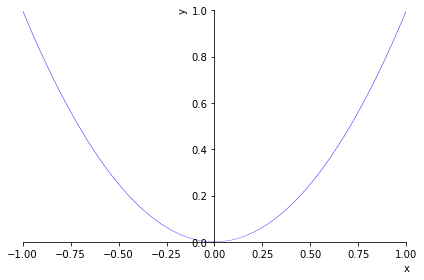

In [27]:
plot_implicit(equation,(x,-1,1),(y,0,1))

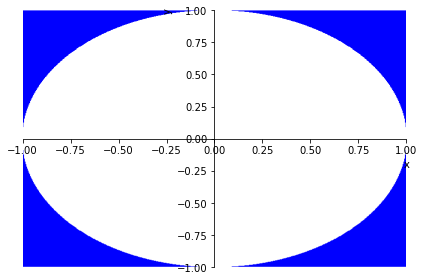

In [28]:
plot_implicit(x**2+y**2>1,(x,-1,1),(y,-1,1))

Some additional plotting functions can be imported from `sympy.plotting`.

In [29]:
from sympy.plotting import plot_parametric, plot3d, plot3d_parametric_line, plot3d_parametric_surface

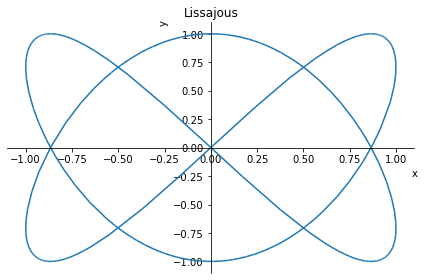

In [30]:
t = Symbol('t')
plot_parametric(sin(2*t),cos(3*t),(t,0,2*pi),
                title='Lissajous',xlabel='x',ylabel='y')

We can also create some 3d plots using `matplotlib` via `sympy`:

In [36]:
# show plots in new window
%matplotlib qt

First we plot the surface $f(x,y) = x^2 + y^2$:

In [37]:
plot3d(x**2+y**2,(x,-2,2),(y,-2,2))

Now a parametric space curve - a spiral.

In [34]:
plot3d_parametric_line(cos(t),sin(t),0.1*t,(t,0,4*pi))

And finally a torus:

In [38]:
u,v = symbols('u v')
a = .5
plot3d_parametric_surface((1+a*cos(u))*cos(v),(1+a*cos(u))*sin(v),a*sin(u),(u,0,2*pi),(v,0,2*pi))

## 4.3 Polynomials

`SymPy` does not expand brackets automatically. The function `expand` is used for this.

In [39]:
a = (x+y-z)**6
a

In [40]:
a = expand(a)
a

Degree of the polynomial $a$ in $x$:

In [41]:
degree(a,x)

Roots of the polynomial $a$:

In [42]:
roots(a,x)

Let's collect terms with same power of $x$ together.

In [43]:
collect(a,y)

Any polynomial with integer coefficients can be factorized into polynomials with integer coefficients (which cannot be factorized further). There exist efficient algorithms to do this.

In [44]:
a = factor(a)
a

`sympy` does not automatically cancel ratios of polynomials by their greatest common divisor. The function `cancel` is used for this.

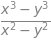

In [45]:
a = (x**3-y**3)/(x**2-y**2)
a

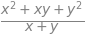

In [46]:
cancel(a)

`sympy` does not automatically bring sums of rational expressions to common denominator. The function `together` is used for this.

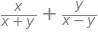

In [47]:
a = y/(x-y)+x/(x+y)
a

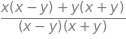

In [48]:
together(a)

The function `simplify` tries to rewrite an expression *in a simplest form*. This concept is not well defined (different forms may be considered simplest in different contexts), and there exists no algorithm for such simplification. The function `simplify` works heuristically, and it is not possible to guess in advance what simplifications it will try. It is very convenient in interactive sessions in order to check if it will succeed in rewriting an expression in some reasonably good form. But it is not desirable to use it in programs. There one should better use more specialized functions which perform well defined expression transformations.

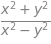

In [49]:
simplify(a)

We can solve the equation $a = 0$ for $x$:

In [50]:
solve(Eq(a,0),x)[1] # solve(Eq(a,0),x)

Partial fraction decomposition with respect to $x$:

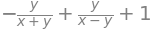

In [51]:
apart(a,x)

Let's substitute some values for the symbols $x$ and $y$.

In [52]:
evaluation = a.subs({x:1,y:2})
evaluation

And how much is it numerically?

In [53]:
evaluation.n()

`subs` can also be used to interchange two variables. However, we need to be careful. Compare the difference:

In [54]:
a.subs([(x,y),(y,x)])
# a.subs([(y,x),(x,y)])

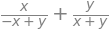

In [55]:
a.subs([(x,y),(y,x)],simultaneous=True)

<div class="alert alert-info"><h4>Homework</h4><p>Read Section 4.4-4.6.</p></div>

## 4.4 Series

### 4.4.1 Taylor Series

The Taylor series can be computed using the function `series`:

In [56]:
exp(x).series(x,0,n=5)

Let's prepare 3 series.

In [57]:
sinx = series(sin(x),x,0,n=8)
sinx

In [58]:
cosx = series(cos(x),x,n=8)
cosx

In [59]:
tanx = series(tan(x),x,n=8)
tanx

Products and ratios of series are not calculated automatically, the function `series` should be applied to them.

In [60]:
series(sinx / cosx,n=8) # sinx / cosx

The following series should be equal to 1. But since `sinx` and `cosx` are known only with a limited accuracy, we obtain 1 with the same accuracy.

In [61]:
series(sinx**2+cosx**2,n=8)

Series can be differentiated and integrated using the functions `diff` and `integrate`, respectively.

In [62]:
diff(cosx,x)

In [63]:
integrate(cosx,x)

It is not possible to substitute a numerical value for the expansion variable in a series (and hence to plot it). To this end one has to remove the $\mathcal{O}$ term first, transforming a series into a polynomial.

In [64]:
sinx.removeO()

### 4.4.2 Summing Series

In `scipy`, `oo` means $\infty$.

In [65]:
n = Symbol('n')
summation(1/n**2,(n,1,oo))

In [66]:
summation(1/n**4,(n,1,oo))

An unevaluated sum is denoted as `Sum`.

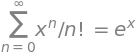

In [67]:
a = Sum(x**n/factorial(n),(n,0,oo))
Eq(a,a.doit())

## 4.5 Linear Algebra

In [68]:
a,b,c,d,e,f = symbols('a b c d e f')

A matrix can be constructed from a list of lists.

In [69]:
M=Matrix([[a,b,c],[d,e,f]])
M

⎡a  b  c⎤
⎢       ⎥
⎣d  e  f⎦

In [70]:
M.shape

A matrix can be constructed from a function.

In [71]:
def g(i,j):
    return Rational(1,i+j+1)
Matrix(3,3,g)

⎡ 1   1/2  1/3⎤
⎢             ⎥
⎢1/2  1/3  1/4⎥
⎢             ⎥
⎣1/3  1/4  1/5⎦

Or from an undefined function.

In [72]:
g = Function('g')
M = Matrix(3,3,g)
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)  g(1, 2)⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [73]:
M[1,2] = 0
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)     0   ⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [74]:
M[2,:]

[g(2, 0)  g(2, 1)  g(2, 2)]

Diagonal matrices can be constructed using the function `diag`:

In [75]:
M = Matrix([[a,1],[0,a]])
diag(1,M,2)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  a  1  0⎥
⎢          ⎥
⎢0  0  a  0⎥
⎢          ⎥
⎣0  0  0  2⎦

With `sympy`, we can just use `*` for matrix multiplication:

In [76]:
A = Matrix([[a,b],[c,d]])
B = Matrix([[1,2],[3,4]])
A*B

⎡a + 3⋅b  2⋅a + 4⋅b⎤
⎢                  ⎥
⎣c + 3⋅d  2⋅c + 4⋅d⎦

In [77]:
B*A

⎡ a + 2⋅c    b + 2⋅d ⎤
⎢                    ⎥
⎣3⋅a + 4⋅c  3⋅b + 4⋅d⎦

In [78]:
simplify(A**(-1))

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

Consider the following matrix:

In [79]:
x = Symbol('x',real=True)
M = Matrix([[(1-x)**3*(3+x),4*x*(1-x**2),-2*(1-x**2)*(3-x)],
          [4*x*(1-x**2),-(1+x)**3*(3-x),2*(1-x**2)*(3+x)],
          [-2*(1-x**2)*(3-x),2*(1-x**2)*(3+x),16*x]])
M

⎡        3                  ⎛     2⎞             ⎛   2    ⎞⎤
⎢ (1 - x) ⋅(x + 3)      4⋅x⋅⎝1 - x ⎠     (3 - x)⋅⎝2⋅x  - 2⎠⎥
⎢                                                          ⎥
⎢       ⎛     2⎞                     3   ⎛       2⎞        ⎥
⎢   4⋅x⋅⎝1 - x ⎠     -(3 - x)⋅(x + 1)    ⎝2 - 2⋅x ⎠⋅(x + 3)⎥
⎢                                                          ⎥
⎢        ⎛   2    ⎞  ⎛       2⎞                            ⎥
⎣(3 - x)⋅⎝2⋅x  - 2⎠  ⎝2 - 2⋅x ⎠⋅(x + 3)         16⋅x       ⎦

The determinant.

In [80]:
det(M)

The eigenvalues and their multiplicities.

In [81]:
M.eigenvals()

The eigenvector corresponding to the second eigenvalue.

In [82]:
M.eigenvects()[1][2][0]

⎡x   1⎤
⎢─ + ─⎥
⎢2   2⎥
⎢     ⎥
⎢x + 1⎥
⎢─────⎥
⎢x - 1⎥
⎢     ⎥
⎣  1  ⎦

## 4.6 Differential Equations

In [83]:
t = Symbol('t')
x = Function('x')
p = Function('p')

First we solve the first-order ODE $\frac{\mathrm{d}}{\mathrm{d}t}x(t) = -x(t)$.

In [84]:
dsolve(Eq(diff(x(t),t),-x(t)),x(t))

Now the second-order ODE $\frac{\mathrm{d}^2}{\mathrm{d}t^2}x(t) = -x(t)$.

In [85]:
dsolve(Eq(diff(x(t),t,2),x(t)),x(t))

Finally a system of first-order equations:
\begin{align*}
\begin{cases}
\frac{\mathrm{d}}{\mathrm{d}t}x(t) = p(t), \\
\frac{\mathrm{d}}{\mathrm{d}t}p(t) = -x(t).
\end{cases}
\end{align*}

In [86]:
dsolve((diff(x(t),t)-p(t),diff(p(t),t)+x(t)))

<div class="alert alert-success"><h4>Done reading?</h4><p>Then read the final section:</p></div>

## 4.7 Limits, Derivatives, Integrals

### 4.7.1 Limits

Limits can be computed by using the function `limit`. We will do this for the function

\begin{align*}
f(x) = \frac{\tan(\sin x)-\sin(\tan x)}{x^7}.
\end{align*}

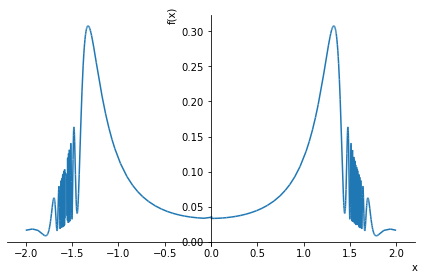

In [87]:
%matplotlib inline
x = Symbol('x')
f = (tan(sin(x))-sin(tan(x)))/x**7
plot(f, (x,-2,2))

In [88]:
limit(f,x,0)

This limit is easy to compute as it is a two-sided limit. Now let's calculate one-sided limits for the function

\begin{align*}
f(x) = \frac{\tan(\sin x)-\sin(\tan x)}{x^7 + \exp\left(-\frac{1}{x}\right)}.
\end{align*}

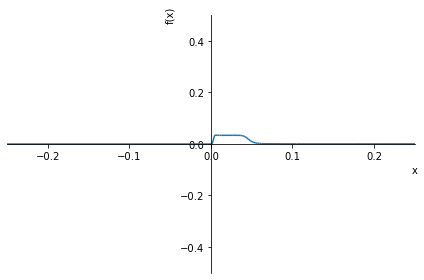

In [91]:
a = (tan(sin(x))-sin(tan(x)))/(x**7 + exp(-1/x))
plot(a, xlim=[-.25,.25], ylim=[-0.5,0.5]) # does not always work

In [90]:
limit(a,x,0,'+')

In [92]:
limit(a,x,0,'-')

### 4.7.2 Derivatives

We compute derivatives using the function `diff`.

In [93]:
a = x*sin(x+y)
diff(a,x,1)

In [94]:
diff(a,y)

Let's take the second derivative in $x$ and the first one in $y$.

In [95]:
diff(a,x,2,y)

Expressions with undefined functions can also be differentiated.

In [96]:
f = Function('f')
b = diff(x*f(x**2),x)

What's this?

In [97]:
b

   2 ⎛ d        ⎞│         ⎛ 2⎞
2⋅x ⋅⎜───(f(ξ₁))⎟│    2 + f⎝x ⎠
     ⎝dξ₁       ⎠│ξ₁=x         

The function `Derivative` represents an unevaluated derivative. It can be evaluated by the method `doit`.

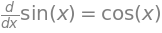

In [98]:
a = Derivative(sin(x),x)
Eq(a,a.doit())
# diff(sin(x),x)

### 4.7.3 Integrals

Integrals can be computed using the function `integrate`.

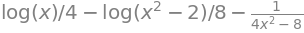

In [99]:
a = 1/(x*(x**2-2)**2)
integrate(a,x)

In [100]:
integrate(1/(exp(x)+1),x)

In [101]:
integrate(x*sin(x),x)

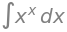

In [102]:
a = integrate(x**x,x)
a.doit()

This is an unevaluated integral (so it is written as `Integral`).

In [103]:
print(a)

Integral(x**x, x)


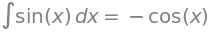

In [104]:
a = Integral(sin(x),x)
Eq(a,a.doit())

### What's next? SAGE.

### 🔴 *Next Week:*

In [106]:
import numpy as np
np.random.choice(['Statistics','Something else'], p=[0.99,0.01])

'Statistics'